In [5]:
# 从docx 工具包中导入要使用的对象
from docx import Document
from docx.shared import Pt,Inches
from docx.shared import RGBColor
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT

In [6]:
# Anaconda 默认不包含 docx工具包，需要执行以下脚本进行安装
# 如果本地没有安装工具包，请去掉“#”，再执行
# !pip install -i https://mirrors.aliyun.com/pypi/simple/ python-docx

# 1、创建一个 Word 文档对象

In [7]:
# Document 不包含文件路径就是在内存中创建 Word 对象
document = Document()

# 2、增加标题、段落

In [15]:
# 标题 0（实际上是段落paragraph）
document.add_heading('Word对象说明', 0)

# 创建段落
p1 = document.add_paragraph('')
p1.add_run('Document').bold = True
p1.add_run('对象包含多个')
# def add_run(self, text=None, style=None):
p1.add_run('Paragraph').bold = True
p1.add_run('对象，').font.size = Pt(16)
p1.add_run('Paragraph').bold = True
p1.add_run('对象包含多个').font.color.rgb = RGBColor(255, 0, 0)
p1.add_run('Run').bold = True
p1.add_run('对象')

# 3、增加无序列表段落

In [9]:
# 标题 1（实际上是段落paragraph）
document.add_heading('无序列表', level=1)
# 列表（段落指定样式）
document.add_paragraph(
    'Document 对象表示整个文档', 
    style='List Bullet'
)
document.add_paragraph(
    'Paragraph 对象表示段落（每一次回车会产生新段落）', 
    style='List Bullet'
)
document.add_paragraph(
    'Run 对象表示相同样式的文本延续', 
    style='List Bullet'
)


# 4、增加有序列表段落

In [10]:
# 标题 1（实际上是段落paragraph）
document.add_heading('有序列表', level=1)
document.add_paragraph(
    'Document 对象表示整个文档', style='List Number'
).style.font.size = Pt(10)

document.add_paragraph(
    'Paragraph 对象表示段落（每一次回车会产生新段落）', style='List Number'
).style.font.name = '微软雅黑'
document.add_paragraph(
    'Run 对象表示相同样式的文本延续', style='List Number'
).style.font.name = '微软雅黑'

# 5、增加表格

In [11]:
document.add_heading('Word对象说明', level=1)
# 元组
records = (
    (1, 'Document', '表示整个文档'),
    (2, 'Paragraph', '表示段落（每一次回车会产生新段落）'),
    (3, 'Run', '表示相同样式的文本延续'),
    ('', '', '')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = '序号'
hdr_cells[1].text = '对象'
hdr_cells[2].text = '说明'
for no,name, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(no)
    row_cells[1].text = name
    row_cells[2].text = desc

merged_cell = table.cell(4, 0).merge(table.cell(4, 2))
merged_cell.text = ''

merged_cell_p = merged_cell.paragraphs[0]
merged_cell_p.add_run('Document 对象包含多个Paragraph').bold = True #第一行合并

# 6、增加分页（开始新的一页）

In [12]:
# 也是一个段落
document.add_page_break()

# 7、增加图片

In [13]:
document.add_heading('Word对象结构图', level=1)
# 添加图片并且居中
paragraph = document.add_paragraph()
# 图片居中设置
paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
run = paragraph.add_run("")
run.add_picture(r'.\images\Word对象结构图.png',width=Inches(4))

# 8、保存到 Word 文件

In [14]:
docx_file = r'.\files\Word_对象说明.docx'
document.save(docx_file)


 
这是一个普通的段落【微软雅黑】
这是一个有【微软雅黑】
粗体字、【微软雅黑,粗体字】
斜体字、【微软雅黑,斜体字】
红色字【微软雅黑,颜色:FF0000】
的段落【微软雅黑】
*************** 图片 **************


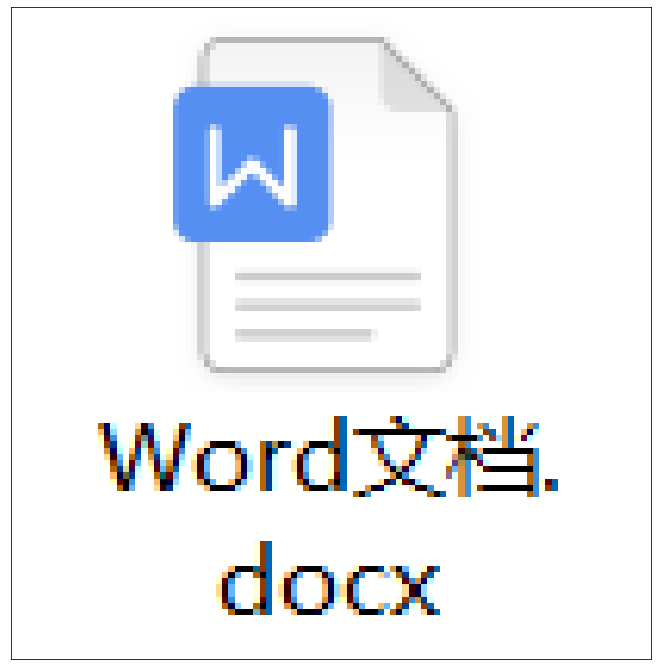

In [21]:
import docx # 导入word工具包


#读取docx中的文本代码示例
def read_docx(docx_file):
    # 打开 Word 文档
    document = docx.Document(docx_file)
    # 读取 Word 文档中的段落
    # 文档中的 paragraphs 段落对象列表
    for paragraph in document.paragraphs:
        # 段落对象中的 runs 文本块对象列表
        for r in paragraph.runs:
            r_info = "" # 存放一个文本块内容和样式信息，print 结果
            if r.font.name is not None: # 如果字体名称不为空，显示字体名
                r_info += r.font.name + ","
            if r.font.size is not None: # 如果字号不为空，显示字号
                r_info += "字号:" + str(round(int(r.font.size)/12700)) + ","
            if r.bold: # 如果是粗体字
                r_info += "粗体字,"
            if r.italic: # 如果是斜体字
                r_info += "斜体字,"
            if r.font.color.rgb is not None: # 如果文字有颜色，显示字体颜色
                r_info += "颜色:" + str(r.font.color.rgb) + ","
            # 如果长度大于0，说明 r_info 有样式信息
            if len(r_info) > 0:
                # r_info 中最后一个字符肯定有一个“逗号”
                r_info = r_info[0:-1] # 去掉末尾的“逗号”
                r_info = r.text + f"【{r_info}】"
            else: # 没有样式信息就直接显示文字
                r_info = r.text
            print(r_info)
            
    # 文档中的 tables 表格对象列表
    for table in document.tables:
        # 打印便于简单的展示表格
        print("---------------------------------")
        for row in table.rows:
            row_text = ""
            for cell in row.cells:
                row_text += cell.text + "\t|\t" # \t 代表的意思是水平制表符，能否保证列尽可能的对齐
            print(row_text[0:-3]) # [0:-3] 去掉最后的 \t|\t
            # 打印便于简单的展示表格
            print("---------------------------------")

    def show_img(blob):
        """
        显示图片的函数（以后的课程再讲解）
        """
        from PIL import Image # 图片处理工具包
        from io import BytesIO # 字节流工具包
        import matplotlib.pyplot as plt # 图片显示
        plt.figure('image',figsize=(16,12))
        plt.xticks([])
        plt.yticks([])
        im = Image.open(BytesIO(blob))
        plt.imshow(im)
        plt.show()

    # 读取 Word 文档中的图片（工具包中没有直接提供图片对象列表）
    print("*************** 图片 **************")
    dict_rel = document.part._rels
    for rel in dict_rel:
        rel = dict_rel[rel]

        if "image" in rel.reltype:
            show_img(rel.target_part.blob)
        else:
            # word文档非常复杂，暂不扩展课程内容
            # 我们把 word的扩展名改一下，您会发现确实复杂
            pass # 这个语法就是 pass 通过，什么事情都不做，以后会经常见到  

read_docx(r".\files\Word结构.docx")